# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Construct the URL for the current city
    city_url = f"{url}{city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1        


    # Run an API request for each of the cities
    try:        
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | cape coast
Processing Record 3 of Set 1 | bothaville
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | khandyga
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | mohr
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | harstad
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | jayapura
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | polyarnyy
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | jackson
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | kalemie
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 | yagry


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1723931903
1,cape coast,5.1053,-1.2466,23.36,87,91,3.75,GH,1723931904
2,bothaville,-27.3887,26.6170,11.62,17,0,1.93,ZA,1723931905
3,carnarvon,-24.8667,113.6333,18.11,57,97,6.00,AU,1723931907
4,khandyga,62.6667,135.6000,10.62,84,13,0.82,RU,1723931908


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1723931903
1,cape coast,5.1053,-1.2466,23.36,87,91,3.75,GH,1723931904
2,bothaville,-27.3887,26.6170,11.62,17,0,1.93,ZA,1723931905
3,carnarvon,-24.8667,113.6333,18.11,57,97,6.00,AU,1723931907
4,khandyga,62.6667,135.6000,10.62,84,13,0.82,RU,1723931908


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

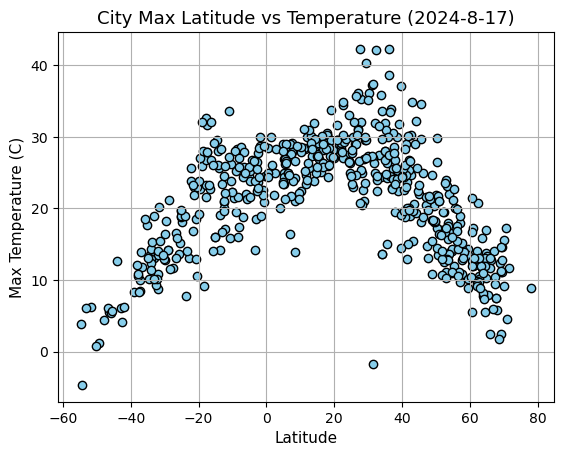

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], 
            edgecolor='black', linewidths=1, marker='o', color='skyblue')

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2024-8-17)", fontsize=13)
plt.xlabel("Latitude", fontsize=11)
plt.ylabel("Max Temperature (C)", fontsize=11)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

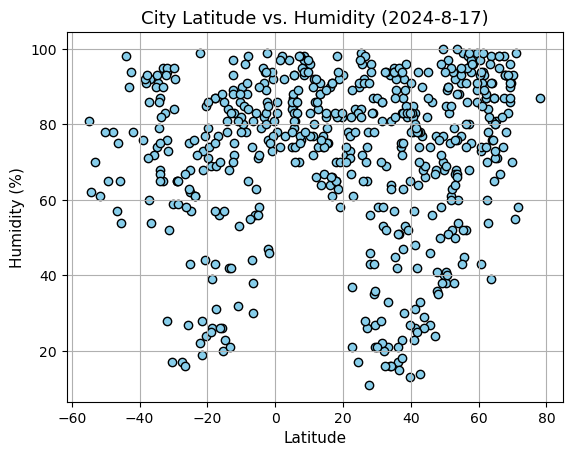

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], 
            edgecolor='black', linewidths=1, marker='o', color='skyblue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-8-17)", fontsize=13)
plt.xlabel("Latitude", fontsize=11)
plt.ylabel("Humidity (%)", fontsize=11)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

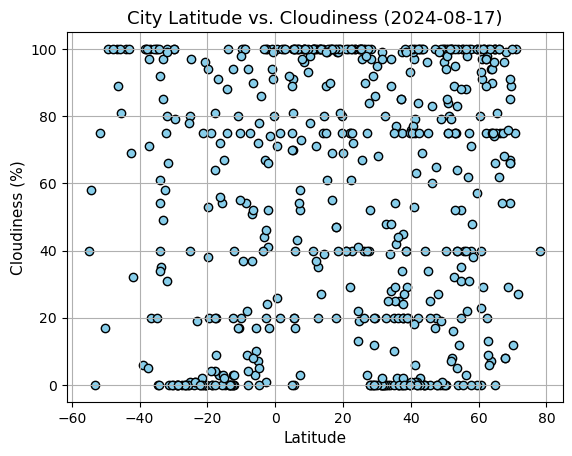

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], 
            edgecolor='black', linewidths=1, marker='o', color='skyblue')


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-17)", fontsize=13)
plt.xlabel("Latitude", fontsize=11)
plt.ylabel("Cloudiness (%)", fontsize=11)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

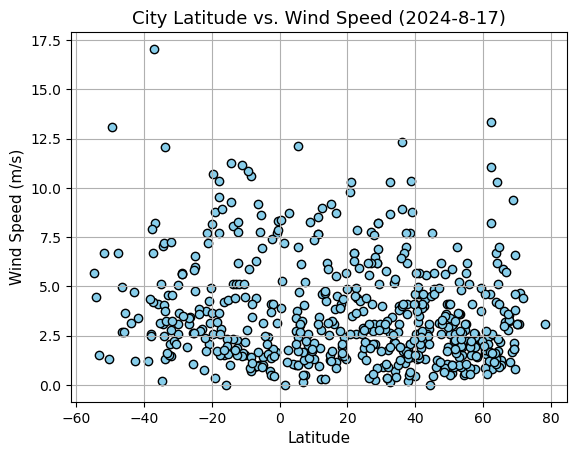

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], 
            edgecolor='black', linewidths=1, marker='o', color='skyblue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-8-17)", fontsize=13)
plt.xlabel("Latitude", fontsize=11)
plt.ylabel("Wind Speed (m/s)", fontsize=11)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linear_regression(x_values, y_values, x_label, y_label, title, annotation_pos):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line
    reg_line = slope * x_values + intercept
    
    # Plot the data and regression line
    plt.scatter(x_values, y_values, marker='o')
    plt.plot(x_values, reg_line, "r", label=f"y = {slope:.2f}x + {intercept:.2f}")

    # Annotate the plot with the linear equation and R-squared value
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", annotation_pos, fontsize=12, color="red")
    print(f"The r^2-value is: {r_value**2}")
                
    
    # Return regression line, slope, intercept, and R-squared value
    return reg_line, slope, intercept, r_value**2


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cape coast,5.1053,-1.2466,23.36,87,91,3.75,GH,1723931904
4,khandyga,62.6667,135.6000,10.62,84,13,0.82,RU,1723931908
9,mohr,54.3528,9.7167,14.08,88,12,0.51,DE,1723931914
10,klyuchi,52.2667,79.1667,19.52,52,100,6.98,RU,1723931915
11,harstad,68.7990,16.5293,12.31,83,29,9.39,NO,1723931916


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1723931903
2,bothaville,-27.3887,26.6170,11.62,17,0,1.93,ZA,1723931905
3,carnarvon,-24.8667,113.6333,18.11,57,97,6.00,AU,1723931907
5,margaret river,-33.9500,115.0667,13.05,68,92,12.08,AU,1723931909
6,adamstown,-25.0660,-130.1015,18.73,62,40,6.54,PN,1723931910


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4830770780013943


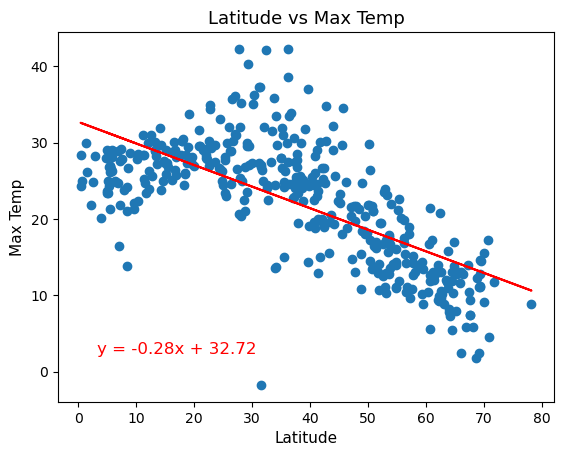

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Define plot properties
x_label = "Latitude"
y_label = "Max Temp"
title = "Latitude vs Max Temp"

# Set labels and title
plt.xlabel(x_label, fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.title(title, fontsize=13)

# Determine a position for annotation on top of the graph
annotation_pos = (x_values.max() - 75, y_values.max() - 40)

# Call the function and get the regression results
reg_line, slope, intercept, r_squared = linear_regression(x_values, y_values, x_label, y_label, title, annotation_pos)

# Show the plot
plt.show()

The r^2-value is: 0.6308096473641929


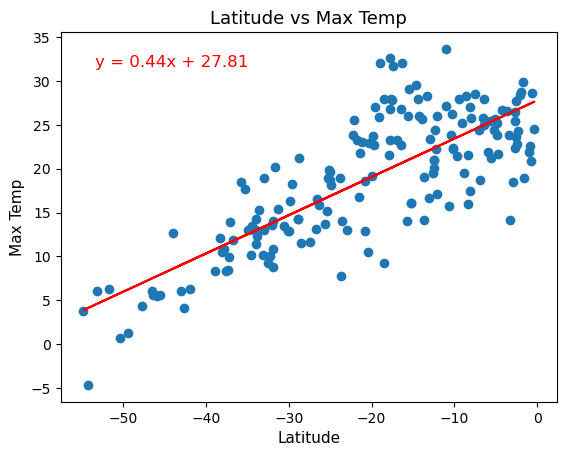

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Define plot properties
x_label = "Latitude"
y_label = "Max Temp"
title = "Latitude vs Max Temp"

# Set labels and title
plt.xlabel(x_label, fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.title(title, fontsize=13)

# Determine a position for annotation on top of the graph
annotation_pos = (x_values.max() - 53, y_values.max() - 2)

# Call the function and get the regression results
reg_line, slope, intercept, r_squared = linear_regression(x_values, y_values, x_label, y_label, title, annotation_pos)

# Show the plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a negative correlation between latitude and temperature, indicating that temperatures decrease as you move farther north. In contrast, the Southern Hemisphere shows a positive correlation, meaning temperatures increase as you move closer to the equator from the south. The relationship is stronger in the Southern Hemisphere (r^2 = 0.63) compared to the Northern Hemisphere (r^2 = 0.48), suggesting that latitude is a better predictor of maximum temperature in the Southern Hemisphere. Additionally, the slope is steeper in the Southern Hemisphere (0.44) than in the Northern Hemisphere (-0.28), indicating a more pronounced change in temperature with latitude in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 3.118277593016251e-05


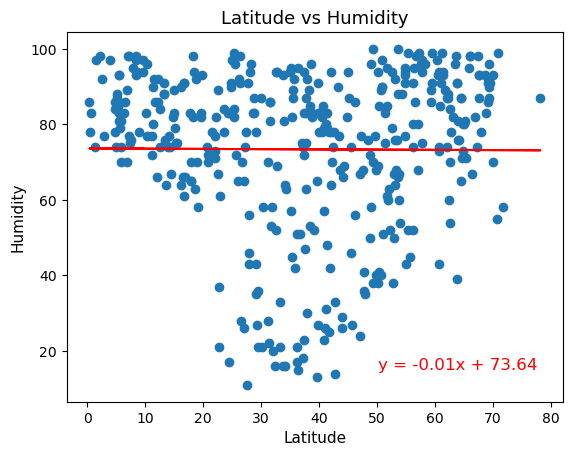

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Define plot properties
x_label = "Latitude"
y_label = "Humidity"
title = "Latitude vs Humidity"

# Set labels and title
plt.xlabel(x_label, fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.title(title, fontsize=13)

# Determine a position for annotation on top of the graph
annotation_pos = (x_values.max() - 28, y_values.max() - 85)

# Call the function and get the regression results
reg_line, slope, intercept, r_squared = linear_regression(x_values, y_values, x_label, y_label, title, annotation_pos)

# Show the plot
plt.show()

The r^2-value is: 0.00011010605256202164


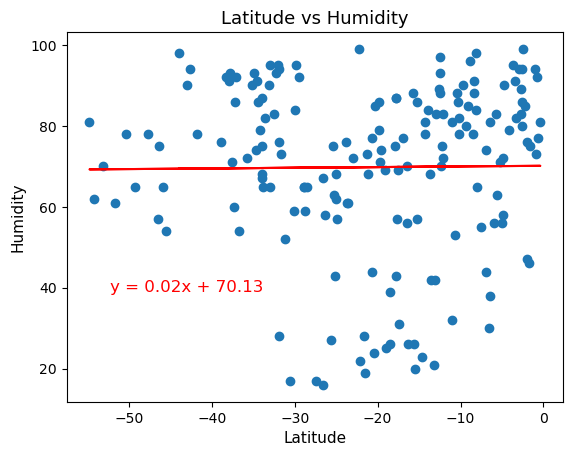

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Define plot properties
x_label = "Latitude"
y_label = "Humidity"
title = "Latitude vs Humidity"

# Set labels and title
plt.xlabel(x_label, fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.title(title, fontsize=13)

# Determine a position for annotation on top of the graph
annotation_pos = (x_values.max() - 52, y_values.max() - 60)

# Call the function and get the regression results
reg_line, slope, intercept, r_squared = linear_regression(x_values, y_values, x_label, y_label, title, annotation_pos)

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
In both the Northern and Southern Hemispheres, the linear regression analysis reveals a very weak correlation between latitude and humidity. The slopes in both cases are close to zero, and the R-squared values are extremely low, indicating that latitude is not a significant predictor of humidity in either hemisphere. This suggests that factors other than latitude are more influential in determining humidity levels

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.007070226859276839


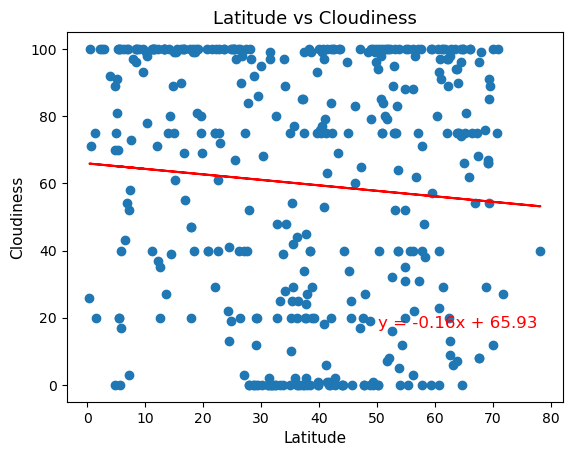

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Define plot properties
x_label = "Latitude"
y_label = "Cloudiness"
title = "Latitude vs Cloudiness"

# Set labels and title
plt.xlabel(x_label, fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.title(title, fontsize=13)

# Determine a position for annotation on top of the graph
annotation_pos = (x_values.max() - 28, y_values.max() - 83)

# Call the function and get the regression results
reg_line, slope, intercept, r_squared = linear_regression(x_values, y_values, x_label, y_label, title, annotation_pos)

# Show the plot
plt.show()

The r^2-value is: 0.0031981545587345317


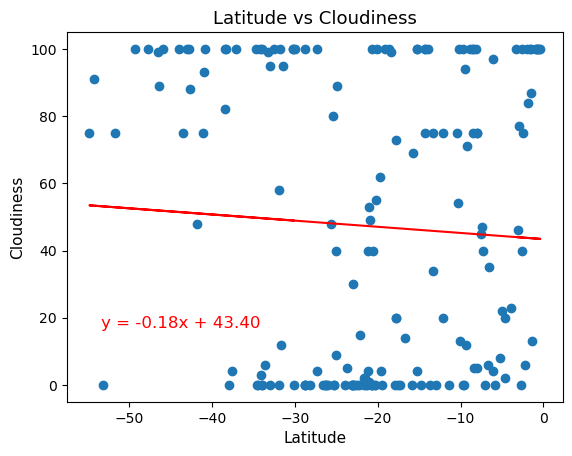

In [195]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Define plot properties
x_label = "Latitude"
y_label = "Cloudiness"
title = "Latitude vs Cloudiness"

# Set labels and title
plt.xlabel(x_label, fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.title(title, fontsize=13)

# Determine a position for annotation on top of the graph
annotation_pos = (x_values.max() - 53, y_values.max() - 83)

# Call the function and get the regression results
reg_line, slope, intercept, r_squared = linear_regression(x_values, y_values, x_label, y_label, title, annotation_pos)

# Show the plot
plt.show()

**Discussion about the linear relationship:** Both hemispheres exhibit a weak negative correlation between latitude and cloudiness, with slopes that are similar in magnitude. However, the R-squared values are extremely low in both cases, indicating that latitude is not a strong predictor of cloudiness in either hemisphere. This consistent lack of strong correlation suggests that factors other than latitude are more critical in determining cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.008899274694617982


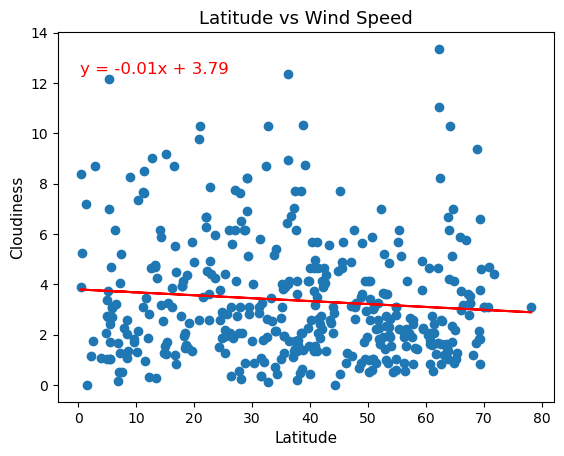

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Define plot properties
x_label = "Latitude"
y_label = "Cloudiness"
title = "Latitude vs Wind Speed"

# Set labels and title
plt.xlabel(x_label, fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.title(title, fontsize=13)

# Determine a position for annotation on top of the graph
annotation_pos = (x_values.max() - 78, y_values.max() - 1)

# Call the function and get the regression results
reg_line, slope, intercept, r_squared = linear_regression(x_values, y_values, x_label, y_label, title, annotation_pos)

# Show the plot
plt.show()

The r^2-value is: 0.008129924800340941


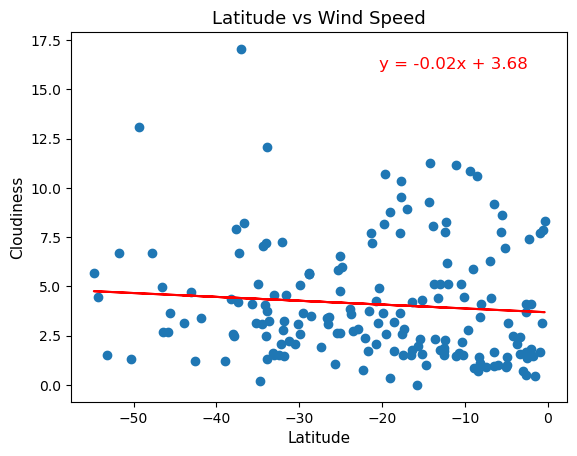

In [24]:
# Southern Hemisphere
# Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Define plot properties
x_label = "Latitude"
y_label = "Cloudiness"
title = "Latitude vs Wind Speed"

# Set labels and title
plt.xlabel(x_label, fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.title(title, fontsize=13)

# Determine a position for annotation on top of the graph
annotation_pos = (x_values.max() - 20, y_values.max() - 1)

# Call the function and get the regression results
reg_line, slope, intercept, r_squared = linear_regression(x_values, y_values, x_label, y_label, title, annotation_pos)

# Show the plot
plt.show()

**Discussion about the linear relationship:** Both hemispheres exhibit a weak negative correlation between latitude and wind speed, with slopes that are similar in magnitude. However, the extremely low R-squared values in both plots suggest that latitude is not a significant predictor of wind speed in either hemisphere. The consistency of this weak correlation across both hemispheres indicates that other environmental factors are likely more influential in determining wind speed.